<div align="center">
   <h1>ANÁLISIS DESCRIPTIVO</h1>
</div>

A continuación se presenta una descripción y visualización de los datos

In [66]:
#IMPORTS

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

In [69]:
#DATABASE CONNECTION

#file_path = r"linkedindatabase.db"
file_path = r"C:\Users\Sarah\Code\ProyectoABD\database\linkedindatabase.db"
conn = sqlite3.connect(file_path)

In [ ]:
#DATAFRAMES CREATION

#numerical data
df_num = pd.read_sql('SELECT * FROM clean_numerical_postings', conn)

df_num = df_num[df_num['max_salary'] <= 10000000]
df_num = df_num[df_num['min_salary'] <= 10000000]
df_num = df_num[df_num['normalized_salary'] <= 10000000]

df_num = df_num[df_num['max_salary'] > 100]
df_num = df_num[df_num['min_salary'] > 100]
df_num = df_num[df_num['normalized_salary'] > 100]

#postings
df_postings = pd.read_sql('SELECT * FROM postings', conn)

#companies
df_companies = pd.read_sql('SELECT * FROM companies', conn)

#industries
df_industries = pd.read_sql('SELECT * FROM industries', conn)

#job industries
df_job_industries = pd.read_sql('SELECT * FROM job_industries', conn)

#skills
df_skills = pd.read_sql('SELECT * FROM skills', conn)

#job skills
df_job_skills = pd.read_sql('SELECT * FROM job_skills', conn)



In [26]:
#FUNCTIONS

#Convert dict to Markdown table
def dict_to_markdown(data):
    headers= "| " + " | ".join(data.keys()) + " |"
    separator = "| " + " | ".join(["---"]*len(data)) + " |"
    rows = []
    for i in range(len(next(iter(data.values())))):
        row = "| " + " | ".join(f"{data[key][i]:,}" if isinstance(data[key][i], float) else str(data[key][i])for key in data) + " |"
        rows.append(row)
    return "\n".join([headers, separator] + rows)

## Análisis Estadístico Básico

se realiza un análisis estadístico básico para los siguientes atributos de cada publicación de trabajo:

* Rango Salarial ofrecido para el puesto
* Número de vistas
* Número de aplicaciones recibidas
* Duración de la publicación

se visualizan algunas medidas de centralización y de dispersión

### Rango salarial

In [131]:
nor_salary_insights = df_num[df_num['normalized_salary'].notnull()]
nor_salary_insights = nor_salary_insights.sort_values(by='normalized_salary', ascending=False)
nor_salary_insights = nor_salary_insights[nor_salary_insights['normalized_salary'] != 0]
nor_salary_insights.rename(columns={'normalized_salary': 'salary'}, inplace=True)
nor_salary_insights['category'] = 'normalized_salary'

max_salary_insights = df_num[df_num['max_salary'].notnull()]
max_salary_insights = max_salary_insights.sort_values(by='max_salary', ascending=False)
max_salary_insights = max_salary_insights[max_salary_insights['max_salary'] != 0]
max_salary_insights.rename(columns={'max_salary': 'salary'}, inplace=True)
max_salary_insights['category'] = 'max_salary'

min_salary_insights = df_num[df_num['min_salary'].notnull()]
min_salary_insights = min_salary_insights.sort_values(by='min_salary', ascending=False)
min_salary_insights = min_salary_insights[min_salary_insights['min_salary'] != 0]
min_salary_insights.rename(columns={'min_salary': 'salary'}, inplace=True)
min_salary_insights['category'] = 'min_salary'

salary_combined = pd.concat([nor_salary_insights, max_salary_insights, min_salary_insights], ignore_index=True)


#### Medidas de Centralización

In [132]:
#mean salary

mean_salary = nor_salary_insights['salary'].mean()
mean_salary_max = max_salary_insights['salary'].mean()
mean_salary_min = min_salary_insights['salary'].mean()

#median salary

median_salary = nor_salary_insights['salary'].median()
median_salary_max = max_salary_insights['salary'].median()
median_salary_min = min_salary_insights['salary'].median()

#mode salary

mode_salary = nor_salary_insights['salary'].mode()
mode_salary_max = max_salary_insights['salary'].mode()
mode_salary_min = min_salary_insights['salary'].mode()


cent_data = {
    'Medida': ['Promedio', 'Mediana', 'Moda'],
    'Salario medio': [int(mean_salary), median_salary, float(mode_salary[0])],
    'Salario máximo': [int(mean_salary_max), median_salary_max, float(mode_salary_max[0])],
    'Salario mínimo': [int(mean_salary_min), median_salary_min, float(mode_salary_min[0])]
}

markdown_table = dict_to_markdown(cent_data)



# Display Markdown table

display(Markdown(markdown_table))


| Medida | Salario medio | Salario máximo | Salario mínimo |
| --- | --- | --- | --- |
| Promedio | 103200 | 163578 | 127983 |
| Mediana | 90,000.0 | 104,000.0 | 78,200.0 |
| Moda | 100,000.0 | 150,000.0 | 100,000.0 |

#### Medidas de Dispersión

#### Análisis Intercuartílico

#### Visualización

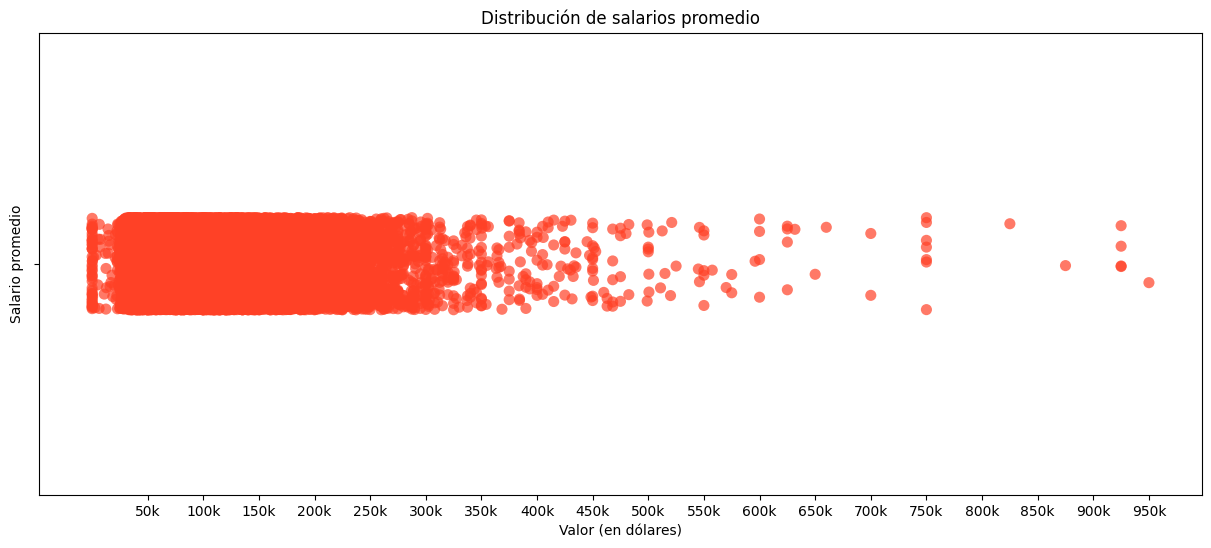

In [133]:
plt.figure(figsize=(15, 6))
sns.stripplot(x='salary', y='category', data=nor_salary_insights, jitter=True, size=8, hue='category',palette='CMRmap', alpha=0.7)

plt.xticks(ticks=np.arange(50000, 1000000, 50000), labels=[f'{int(i/1000):,}k' for i in np.arange(50000, 1000000, 50000)])
plt.yticks(ticks=[0], labels=[''])
plt.ylabel('Salario promedio')
plt.xlabel('Valor (en dólares)')
plt.title('Distribución de salarios promedio')

plt.show()

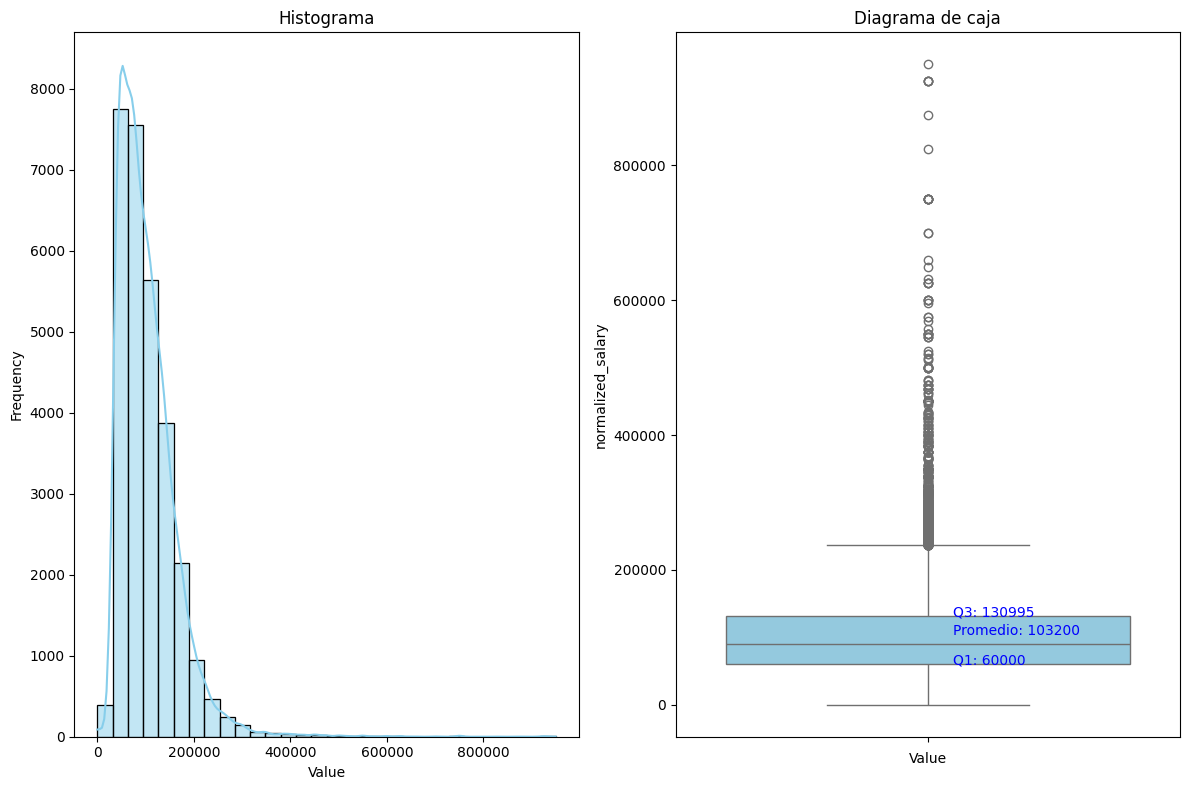

In [123]:
salary = df_num['normalized_salary'].dropna()
# Plotting the histogram
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.histplot(salary, kde=True, color='skyblue', bins=30)
plt.title('Histograma')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Calculate mean and quartiles
mean_value = np.mean(salary)
q1 = np.percentile(salary, 25)
q3 = np.percentile(salary, 75)

# Plotting the boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=salary, color='skyblue', orient='v')
plt.title('Diagrama de caja')
plt.xlabel('Value')

# Annotate the mean and quartile values on the boxplot
plt.text(0.05, mean_value, f'Promedio: {mean_value:.0f}', color='blue', fontsize=10)
plt.text(0.05, q1, f'Q1: {q1:.0f}', color='blue', fontsize=10)
plt.text(0.05, q3, f'Q3: {q3:.0f}', color='blue', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

### Visitas

In [124]:
views = df_num['views'].dropna()

#### Medidas de Centralización

In [125]:
#mean views
mean_views = views.mean()

#median views
median_views = views.median()

#mode views
mode_views = views.mode()

cent_data = {
    'Medida': ['Promedio', 'Mediana', 'Moda'],
    'Número de vistas': [mean_views, median_views, mode_views[0]],
}

markdown_table = dict_to_markdown(cent_data)

# Display Markdown table

display(Markdown(markdown_table))


| Medida | Número de vistas |
| --- | --- |
| Promedio | 21.302978018565167 |
| Mediana | 5.0 |
| Moda | 4.0 |

#### Medidas de Dispersión

#### Análisis Intercuartílico

#### Visualización

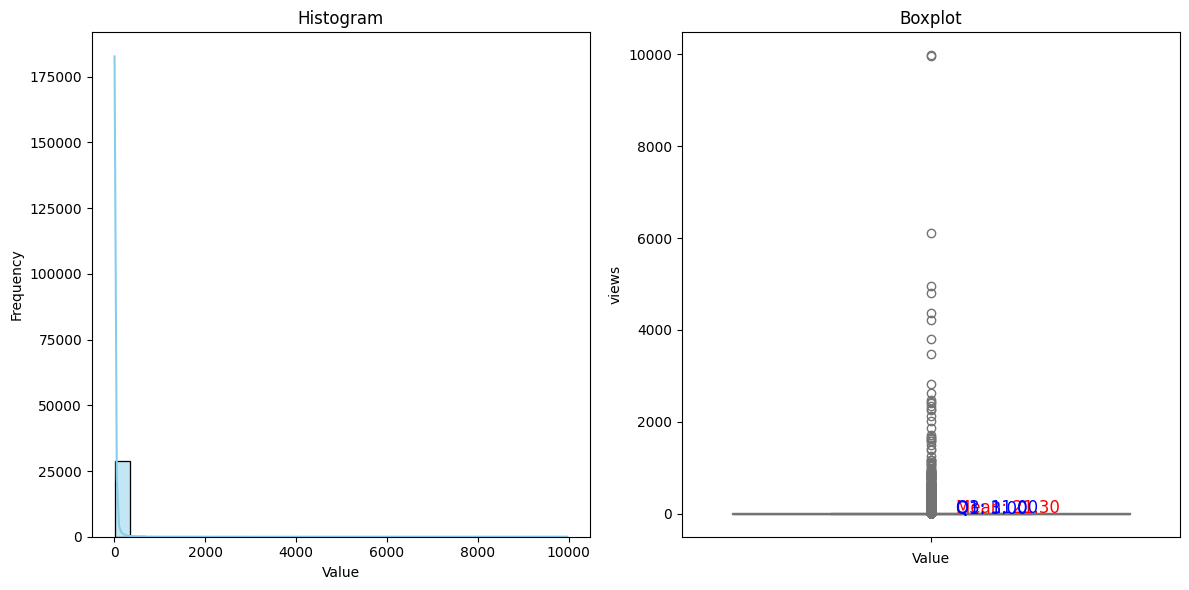

In [126]:

# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.histplot(views, kde=True, color='skyblue', bins=30)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Calculate mean and quartiles
mean_value = np.mean(views)
q1 = np.percentile(views, 25)
q3 = np.percentile(views, 75)

# Plotting the boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=views, color='lightgreen')
plt.title('Boxplot')
plt.xlabel('Value')

# Annotate the mean and quartile values on the boxplot
plt.text(0.05, mean_value, f'Mean: {mean_value:.2f}', color='red', fontsize=12)
plt.text(0.05, q1, f'Q1: {q1:.2f}', color='blue', fontsize=12)
plt.text(0.05, q3, f'Q3: {q3:.2f}', color='blue', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


### Aplicaciones por puesto

In [127]:
apps = df_num['applies'].dropna()

#### Medidas de Centralización

In [128]:
#mean apps
mean_apps = apps.mean()

#median apps
median_apps = apps.median()

#mode apps
mode_apps = apps.mode()

cent_data = {
    'Medida': ['Promedio', 'Mediana', 'Moda'],
    'Número de aplicaciones': [int(mean_apps), median_apps, mode_apps[0]],
}

markdown_table = dict_to_markdown(cent_data)

# Display Markdown table

display(Markdown(markdown_table))

| Medida | Número de aplicaciones |
| --- | --- |
| Promedio | 12 |
| Mediana | 3.0 |
| Moda | 1.0 |

#### Medidas de Dispersión

#### Análisis Intercuartílico

#### Visualización

### Duración de la publicación

In [129]:
#get job duration values
def get_duration(row):
    if pd.notna(row['closed_time']):
        return row['closed_time'] - row['listed_time']
    else:
        return None

df_num['duration'] = df_num.apply(get_duration, axis=1)
duration = df_num['duration'].dropna()

#### Medidas de Centralización

In [130]:
#mean duration of postings
mean_duration = duration.mean()

#median duration of postings
median_duration = duration.median()

#mode duration of postings
mode_duration = duration.mode()

#convert unix time to days, hours, minutes
def convert_time(duration):
    days = duration//86400
    hours = (duration%86400)//3600
    minutes = (duration%3600)//60
    return days, hours, minutes


cent_data = {
    'Medida': ['Promedio', 'Mediana', 'Moda'],
    'Duración de la publicación': [mean_duration, median_duration, mode_duration[0]],
}

def dict_to_datetime_markdown(data):
    headers= "| " + " | ".join(data.keys()) + " |"
    separator = "| " + " | ".join(["---"]*len(data)) + " |"
    rows = []
    for i in range(len(next(iter(data.values())))):
        row = "| " + " | ".join(f"{int(convert_time(data[key][i])[0])}d{int(convert_time(data[key][i])[1])}h{convert_time(int(data[key][i]))[2]}" if isinstance(data[key][i], float) else str(data[key][i])for key in data) + " |"
        rows.append(row)
    return "\n".join([headers, separator] + rows)

markdown_table = dict_to_datetime_markdown(cent_data)

# Display Markdown table

display(Markdown(markdown_table))

| Medida | Duración de la publicación |
| --- | --- |
| Promedio | 34d17h0 |
| Mediana | 12d15h3 |
| Moda | 0d18h36 |

#### Medidas de Dispersión

#### Análisis Intercuartílico

#### Visualización

## Análisis de atributos cualitativos

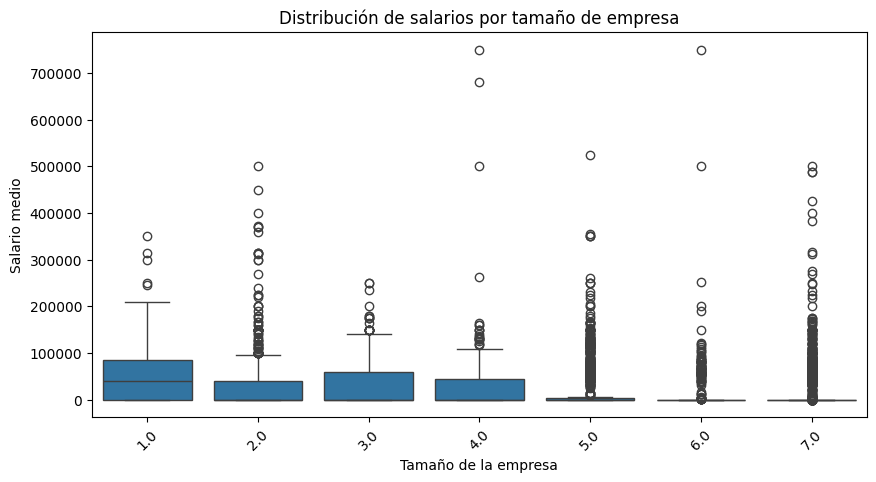

In [107]:
df_merged = df_postings.merge(df_companies, left_on='company_id', right_on='company_id', how='left')
plt.figure(figsize=(10,5))
sns.boxplot(x='company_size', y='med_salary', data=df_merged)
plt.title('Distribución de salarios por tamaño de empresa')
plt.xlabel('Tamaño de la empresa')
plt.ylabel('Salario medio')
plt.xticks(rotation=45)
plt.show()

[(0.275191, 0.194905, 0.496005), (0.212395, 0.359683, 0.55171), (0.153364, 0.497, 0.557724), (0.122312, 0.633153, 0.530398), (0.288921, 0.758394, 0.428426), (0.626579, 0.854645, 0.223353)]


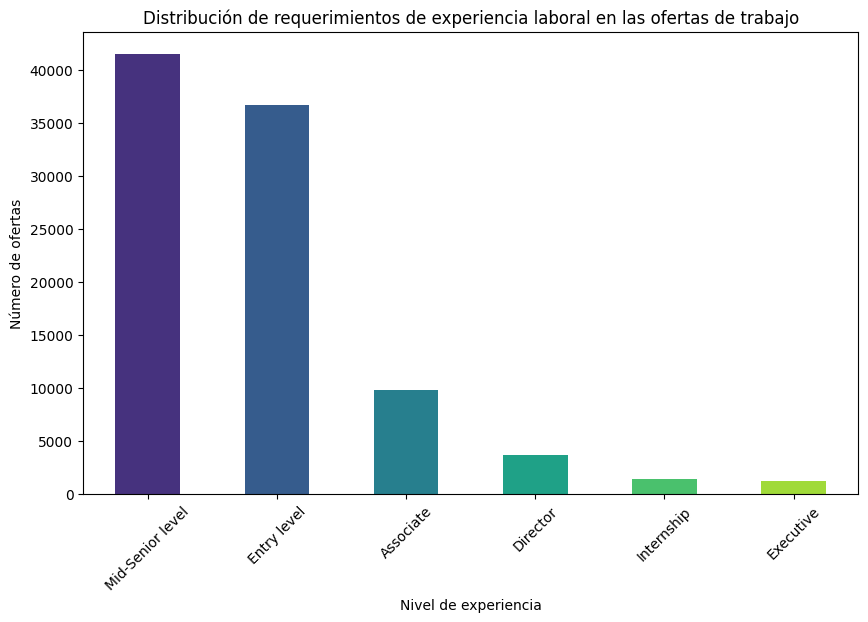

In [141]:

experience_level_distribution = df_postings['formatted_experience_level'].value_counts()

# Define base colors (can be any color scheme)
base_colors = sns.color_palette('viridis', 6)

print(base_colors)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
experience_level_distribution.plot(kind='bar', color=base_colors)
plt.title('Distribución de requerimientos de experiencia laboral en las ofertas de trabajo')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Número de ofertas')
plt.xticks(rotation=45)
plt.show()

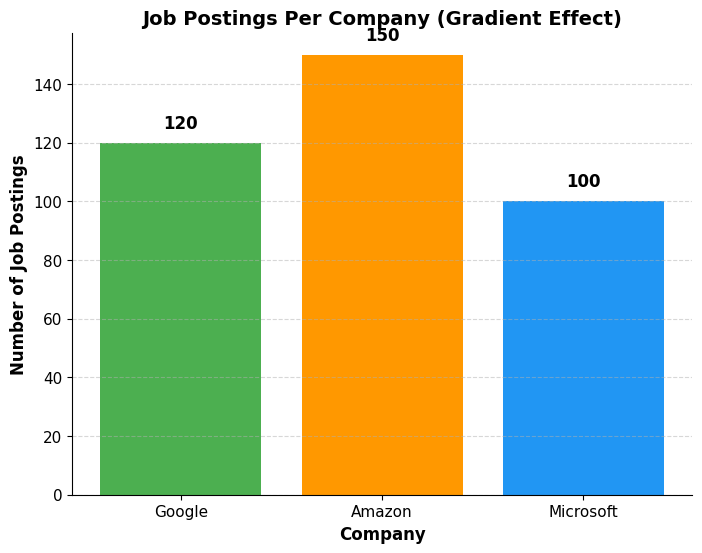

In [137]:
# Sample Data
companies = ['Google', 'Amazon', 'Microsoft']
job_counts = [120, 150, 100]
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define base colors (can be any color scheme)
base_colors = ['#4CAF50', '#FF9800', '#2196F3'] # Green, Orange, Blue

# Create a gradient effect by layering transparent bars
num_layers = 10 # More layers = smoother gradient
for i in range(num_layers):
    alpha = (i + 1) / num_layers # Increasing opacity
    for j, value in enumerate(job_counts):
        ax.bar(companies[j], value * (i + 1) / num_layers, color=base_colors[j], alpha=alpha, edgecolor='none')

# Labels & Title
plt.xlabel('Company', fontsize=12, fontweight='bold')
plt.ylabel('Number of Job Postings', fontsize=12, fontweight='bold')
plt.title('Job Postings Per Company (Gradient Effect)', fontsize=14, fontweight='bold')

# Format Ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add Grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate Bars
for i, value in enumerate(job_counts):
    plt.text(i, value + 5, str(value), ha='center', fontsize=12, fontweight='bold', color='black')
    
# Remove Borders (Spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#

In [ ]:
#IMPORTANTE: CERRAR LA CONEXIÓN
conn.close()